In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
import xlrd

Using TensorFlow backend.


# ورودی دادن به برنامه:

In [2]:
df = pd.read_html('./dataset/ايران‌ خودرو.xls')#ورودی بعنوان یک دیتافریم ذخیره میکنیم


In [3]:
df[0].head()

,تاريخ,نماد,حجم,ارزش,دفعات معامله,بیشترین,کمترین,مقدار قیمت پایانی,تغییر قیمت پایانی,درصد قیمت پایانی,مقدار آخرین قیمت,تغییر آخرین قیمت,درصد آخرین قیمت,قیمت روز قبل,ارزش بازار
0,1387/9/23,خودرو1,511302,669806563,83,1311.0,1310.0,1295.0,4.0,0.309837,1310.0,19.0,1.471727,1291.0,1.981350e+13
1,1387/9/24,خودرو1,15490838,19692629778,371,1312.0,1270.0,1271.0,-24.0,-1.853282,1270.0,-25.0,-1.930502,1295.0,1.944630e+13
2,1387/9/25,خودرو1,2627515,3434177739,97,1308.0,1307.0,1307.0,36.0,2.832415,1308.0,37.0,2.911094,1271.0,1.999710e+13
3,1387/9/26,خودرو1,504740,663733120,87,1316.0,1315.0,1309.0,2.0,0.153022,1315.0,8.0,0.612089,1307.0,2.002770e+13
4,1387/9/30,خودرو1,561848,737144576,85,1312.0,1312.0,1310.0,1.0,0.076394,1312.0,3.0,0.229183,1309.0,2.004300e+13


In [4]:
type(df[0])

pandas.core.frame.DataFrame

In [5]:
df[0] = df[0].reset_index(drop=True)
df[0].head()

,تاريخ,نماد,حجم,ارزش,دفعات معامله,بیشترین,کمترین,مقدار قیمت پایانی,تغییر قیمت پایانی,درصد قیمت پایانی,مقدار آخرین قیمت,تغییر آخرین قیمت,درصد آخرین قیمت,قیمت روز قبل,ارزش بازار
0,1387/9/23,خودرو1,511302,669806563,83,1311.0,1310.0,1295.0,4.0,0.309837,1310.0,19.0,1.471727,1291.0,1.981350e+13
1,1387/9/24,خودرو1,15490838,19692629778,371,1312.0,1270.0,1271.0,-24.0,-1.853282,1270.0,-25.0,-1.930502,1295.0,1.944630e+13
2,1387/9/25,خودرو1,2627515,3434177739,97,1308.0,1307.0,1307.0,36.0,2.832415,1308.0,37.0,2.911094,1271.0,1.999710e+13
3,1387/9/26,خودرو1,504740,663733120,87,1316.0,1315.0,1309.0,2.0,0.153022,1315.0,8.0,0.612089,1307.0,2.002770e+13
4,1387/9/30,خودرو1,561848,737144576,85,1312.0,1312.0,1310.0,1.0,0.076394,1312.0,3.0,0.229183,1309.0,2.004300e+13


In [6]:
col_list = df[0].columns.tolist()
col_list

['تاريخ',
 'نماد',
 'حجم',
 'ارزش',
 'دفعات معامله',
 'بیشترین',
 'کمترین',
 'مقدار قیمت پایانی',
 'تغییر قیمت پایانی',
 'درصد قیمت پایانی',
 'مقدار آخرین قیمت',
 'تغییر آخرین قیمت',
 'درصد آخرین قیمت',
 'قیمت روز قبل',
 'ارزش بازار']

In [7]:
df[0] = df[0][col_list]
df[0].head()

,تاريخ,نماد,حجم,ارزش,دفعات معامله,بیشترین,کمترین,مقدار قیمت پایانی,تغییر قیمت پایانی,درصد قیمت پایانی,مقدار آخرین قیمت,تغییر آخرین قیمت,درصد آخرین قیمت,قیمت روز قبل,ارزش بازار
0,1387/9/23,خودرو1,511302,669806563,83,1311.0,1310.0,1295.0,4.0,0.309837,1310.0,19.0,1.471727,1291.0,1.981350e+13
1,1387/9/24,خودرو1,15490838,19692629778,371,1312.0,1270.0,1271.0,-24.0,-1.853282,1270.0,-25.0,-1.930502,1295.0,1.944630e+13
2,1387/9/25,خودرو1,2627515,3434177739,97,1308.0,1307.0,1307.0,36.0,2.832415,1308.0,37.0,2.911094,1271.0,1.999710e+13
3,1387/9/26,خودرو1,504740,663733120,87,1316.0,1315.0,1309.0,2.0,0.153022,1315.0,8.0,0.612089,1307.0,2.002770e+13
4,1387/9/30,خودرو1,561848,737144576,85,1312.0,1312.0,1310.0,1.0,0.076394,1312.0,3.0,0.229183,1309.0,2.004300e+13


In [8]:

df[0] = df[0].drop(['تاريخ',
 'نماد',
 'دفعات معامله',
 'تغییر قیمت پایانی',
 'درصد قیمت پایانی',
 'تغییر آخرین قیمت',
 'درصد آخرین قیمت',
 'قیمت روز قبل',
 'ارزش بازار',
 'ارزش'], axis=1)
df[0].head()

,حجم,بیشترین,کمترین,مقدار قیمت پایانی,مقدار آخرین قیمت
0,511302,1311.0,1310.0,1295.0,1310.0
1,15490838,1312.0,1270.0,1271.0,1270.0
2,2627515,1308.0,1307.0,1307.0,1308.0
3,504740,1316.0,1315.0,1309.0,1315.0
4,561848,1312.0,1312.0,1310.0,1312.0


In [9]:
df = df[0].rename({"بیشترین": "high",
    "کمترین" : "low",
    "حجم" : "volume",
    "مقدار قیمت پایانی" : "open",
    "مقدار آخرین قیمت": "close"},axis='columns')

In [10]:
stock_index = 'margham'#اسم رو میتونید هر چی که دوست داشتید بزارید.صرفا برای ذخیره کردن استفاده شده
csv_name = 'stock-{}'.format(stock_index)
#start_date = '1388/1/31'
#end_date = None

In [11]:
df = df.to_csv(csv_name, index=False)


In [12]:
validate_df = pd.read_csv(csv_name)
validate_df.head()

,volume,high,low,open,close
0,511302,1311.0,1310.0,1295.0,1310.0
1,15490838,1312.0,1270.0,1271.0,1270.0
2,2627515,1308.0,1307.0,1307.0,1308.0
3,504740,1316.0,1315.0,1309.0,1315.0
4,561848,1312.0,1312.0,1310.0,1312.0


In [13]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df["open"] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df["high"] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df["low"] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df["volume"] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df["close"] = min_max_scaler.fit_transform(df["close"].values.reshape(-1,1))
    return df
df = normalize_data(validate_df)
df.head()

C:\ProgramData\Anaconda3\envs\tensorflowg\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,volume,high,low,open,close
0,0.002040,0.111759,0.121306,0.112618,0.117122
1,0.061949,0.112012,0.110938,0.106476,0.106915
2,0.010504,0.110998,0.120529,0.115690,0.116611
3,0.002014,0.113026,0.122602,0.116202,0.118398
4,0.002243,0.112012,0.121825,0.116458,0.117632


In [14]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 
    result = []
    
    for index in range(len(data) - sequence_length): 
        result.append(data[index: index + sequence_length]) 
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [15]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    #adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['mae'])
    print("Compilation Time : ", time.time() - start)
    return model

In [16]:
window = 20
X_train, y_train, X_test, y_test = load_data(df, window)
print (X_train[0], y_train[0])

C:\ProgramData\Anaconda3\envs\tensorflowg\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[[0.00204049 0.11175874 0.12130638 0.11261838 0.11712171]
 [0.06194924 0.11201216 0.11093831 0.10647556 0.10691503]
 [0.01050401 0.11099848 0.12052877 0.11568979 0.11661138]
 [0.00201424 0.11302585 0.12260238 0.11620169 0.11839755]
 [0.00224264 0.11201216 0.12182478 0.11645764 0.11763205]
 [0.0007559  0.11302585 0.12260238 0.11645764 0.11839755]
 [0.00095161 0.11251901 0.12234318 0.11645764 0.11814238]
 [0.02161984 0.11251901 0.11119751 0.10698746 0.11788722]
 [0.0092141  0.11099848 0.12078797 0.11517789 0.11661138]
 [0.0016423  0.11074506 0.12052877 0.11517789 0.11635621]
 [0.00163452 0.11556006 0.1251944  0.11594574 0.12094922]
 [0.00182355 0.11378611 0.12337999 0.11645764 0.11916305]
 [0.00155803 0.11353269 0.12337999 0.11671359 0.11916305]
 [0.00145185 0.11378611 0.12337999 0.11696954 0.11941822]
 [0.00163909 0.11403953 0.12363919 0.11722549 0.11941822]
 [0.00147782 0.11429295 0.12389839 0.11748144 0.11992855]
 [0.00143518 0.11403953 0.12389839 0.11773739 0.11967339]
 [0.00142051 0

In [17]:
model = build_model([5,window,1])

Compilation Time :  0.02498340606689453


model.history()

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 256)           268288    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 801,857
Trainable params: 801,857
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,batch_size=512,epochs=90,verbose=1)

Epoch 1/90
1796/1796 [==============================] - 18s 10ms/step - loss: 0.1879 - mean_absolute_error: 0.3816
Epoch 2/90
1796/1796 [==============================] - 1s 422us/step - loss: 0.0814 - mean_absolute_error: 0.2251
Epoch 3/90
1796/1796 [==============================] - 1s 419us/step - loss: 0.0520 - mean_absolute_error: 0.1929
Epoch 4/90
1796/1796 [==============================] - 1s 463us/step - loss: 0.0333 - mean_absolute_error: 0.1463
Epoch 5/90
1796/1796 [==============================] - 1s 422us/step - loss: 0.0327 - mean_absolute_error: 0.1399
Epoch 6/90
1796/1796 [==============================] - 1s 435us/step - loss: 0.0165 - mean_absolute_error: 0.0995
Epoch 7/90
1796/1796 [==============================] - 1s 425us/step - loss: 0.0095 - mean_absolute_error: 0.0742
Epoch 8/90
1796/1796 [==============================] - 1s 417us/step - loss: 0.0081 - mean_absolute_error: 0.0710
Epoch 9/90
1796/1796 [==============================] - 1s 421us/step - loss: 0.

1796/1796 [==============================] - 1s 419us/step - loss: 0.0018 - mean_absolute_error: 0.0300
Epoch 72/90
1796/1796 [==============================] - 1s 427us/step - loss: 0.0016 - mean_absolute_error: 0.0284
Epoch 73/90
1796/1796 [==============================] - 1s 437us/step - loss: 0.0016 - mean_absolute_error: 0.0283
Epoch 74/90
1796/1796 [==============================] - 1s 423us/step - loss: 0.0016 - mean_absolute_error: 0.0293
Epoch 75/90
1796/1796 [==============================] - 1s 445us/step - loss: 0.0017 - mean_absolute_error: 0.0300
Epoch 76/90
1796/1796 [==============================] - 1s 424us/step - loss: 0.0015 - mean_absolute_error: 0.0284
Epoch 77/90
1796/1796 [==============================] - 1s 425us/step - loss: 0.0015 - mean_absolute_error: 0.0281
Epoch 78/90
1796/1796 [==============================] - 1s 443us/step - loss: 0.0015 - mean_absolute_error: 0.0277
Epoch 79/90
1796/1796 [==============================] - 1s 423us/step - loss: 0.001

In [25]:

p = model.predict(X_test)
print (p.shape)
#نشون دادن دیتاهای نرمال شده
for u in range(len(y_test)):
    # pr = پیش بینی روز u 
    pr = p[u][0]
    
    print(u, y_test[u], pr)
    


(199, 1)
0 0.46644552181679 0.46768835
1 0.4564940035723398 0.46407896
2 0.4557285021689206 0.46381155
3 0.45139066088287827 0.4646032
4 0.4457769839244705 0.46552223
5 0.4399081398315896 0.46511197
6 0.4462873181934166 0.46305788
7 0.4467976524623628 0.4603595
8 0.4516458280173513 0.4585311
9 0.4419494769073743 0.4586457
10 0.4393978055626435 0.45857486
11 0.44654248532788976 0.45780054
12 0.4590456749170706 0.45728114
13 0.4689971931615208 0.45871904
14 0.47894871140597084 0.4628931
15 0.5036999234498596 0.47274992
16 0.49068639959173255 0.48662913
17 0.5287063026282214 0.49914086
18 0.5458025006379178 0.5192119
19 0.5230926256698136 0.54395413
20 0.5243684613421791 0.55572295
21 0.5281959683592753 0.5559149
22 0.5743812196989028 0.552143
23 0.5843327379433528 0.5629904
24 0.5736157182954835 0.57534957
25 0.5866292421536106 0.5825123
26 0.5907119163051798 0.58592737
27 0.5577953559581526 0.59029144
28 0.5343199795866291 0.5959503
29 0.5228374585353406 0.59389347
30 0.4978310793569788

In [26]:
df = pd.read_csv(csv_name)
def denormalize(df, normalized_value): 
    df = df['close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [27]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00098 MSE (0.03 RMSE)
Test Score: 0.00081 MSE (0.03 RMSE)


(0.0009839595251897907, 0.0008069413863871265)

# خروجی برنامه بصورت نمودار و داده:

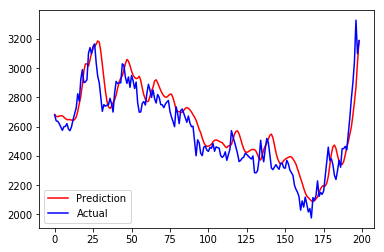

In [23]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [24]:

for i in range(len(y_test)):
    
    print(i,newp[i] ,newy_test[i])

0 [2683.8708] [2679.]
1 [2669.7253] [2640.]
2 [2668.6775] [2637.]
3 [2671.7798] [2620.]
4 [2675.3816] [2598.]
5 [2673.774] [2575.]
6 [2665.7239] [2600.]
7 [2655.149] [2602.]
8 [2647.9836] [2621.]
9 [2648.4326] [2583.]
10 [2648.155] [2573.]
11 [2645.1204] [2601.]
12 [2643.085] [2650.]
13 [2648.72] [2689.]
14 [2665.0781] [2728.]
15 [2703.707] [2825.]
16 [2758.0996] [2774.]
17 [2807.133] [2923.]
18 [2885.7915] [2990.]
19 [2982.7563] [2901.]
20 [3028.8782] [2906.]
21 [3029.6304] [2921.]
22 [3014.8484] [3102.]
23 [3057.3594] [3141.]
24 [3105.795] [3099.]
25 [3133.8657] [3150.]
26 [3147.2493] [3166.]
27 [3164.352] [3037.]
28 [3186.5293] [2945.]
29 [3178.4685] [2900.]
30 [3115.8286] [2802.]
31 [3025.0598] [2705.]
32 [2931.9814] [2751.]
33 [2843.104] [2740.]
34 [2775.518] [2747.]
35 [2735.7705] [2750.]
36 [2725.1372] [2794.]
37 [2739.0227] [2756.]
38 [2765.1958] [2700.]
39 [2782.686] [2830.]
40 [2817.2654] [2910.]
41 [2864.6702] [2895.]
42 [2906.5715] [2900.]
43 [2932.7842] [2900.]
44 [2947.74